In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes_df = pd.read_csv(Path('CleanerDiabetesData.csv'))
pimaData_df = pd.read_csv(Path('CleanerPimaData.csv'))
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,84,82,31,125,38.2,0.233,23,0
1,0,135,68,42,250,42.3,0.365,24,1
2,1,139,62,41,480,40.7,0.536,21,0
3,0,173,78,32,265,46.5,1.159,58,0
4,2,83,65,28,66,36.8,0.629,24,0


In [3]:
factors_df = diabetes_df.drop('Outcome', axis = 1)
#Ind_df = pd.get_dummies(Independent_df)
factors_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,84,82,31,125,38.2,0.233,23
1,0,135,68,42,250,42.3,0.365,24
2,1,139,62,41,480,40.7,0.536,21
3,0,173,78,32,265,46.5,1.159,58
4,2,83,65,28,66,36.8,0.629,24


In [4]:
diab_out_df = diabetes_df.Outcome
diab_out_df.head()

0    0
1    1
2    0
3    0
4    0
Name: Outcome, dtype: int64

In [5]:
# Split into train and test data:
X = factors_df
y = diab_out_df

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier2 = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.7860824742268041
Logistic Regression Testing Data Score: 0.7142857142857143


C:\Users\Walte\.conda\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {clf.score(X_test, y_test)}')

Random Forest Training Score: 1.0
Random Forest Testing Score: 0.9922779922779923


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
classifier2.fit(X_train_scaled, y_train)
print(f"Logistic Regression Scaled Training Data Score: {classifier2.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Scaled Testing Data Score: {classifier2.score(X_test_scaled, y_test)}")

Logistic Regression Scaled Training Data Score: 0.7925257731958762
Logistic Regression Scaled Testing Data Score: 0.7722007722007722


In [10]:
clf2 = RandomForestClassifier(random_state=18, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Random Forest Scaled Training Score: {clf2.score(X_train_scaled, y_train)}')
print(f'Random Forest Scaled Testing Score: {clf2.score(X_test_scaled, y_test)}')

Random Forest Scaled Training Score: 1.0
Random Forest Scaled Testing Score: 0.9922779922779923


###  No Difference between scaled and unscaled data!

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


k: 1, Train/Test Score: 1.000/0.996
k: 3, Train/Test Score: 0.973/0.892
k: 5, Train/Test Score: 0.911/0.846
k: 7, Train/Test Score: 0.848/0.803
k: 9, Train/Test Score: 0.845/0.799
k: 11, Train/Test Score: 0.838/0.795
k: 13, Train/Test Score: 0.827/0.772
k: 15, Train/Test Score: 0.826/0.776
k: 17, Train/Test Score: 0.814/0.784
k: 19, Train/Test Score: 0.809/0.792
k: 21, Train/Test Score: 0.817/0.795
k: 23, Train/Test Score: 0.820/0.792
k: 25, Train/Test Score: 0.807/0.788
k: 27, Train/Test Score: 0.798/0.780
k: 29, Train/Test Score: 0.795/0.761
k: 31, Train/Test Score: 0.794/0.764
k: 33, Train/Test Score: 0.790/0.780
k: 35, Train/Test Score: 0.789/0.776
k: 37, Train/Test Score: 0.794/0.776
k: 39, Train/Test Score: 0.799/0.772
k: 41, Train/Test Score: 0.784/0.761
k: 43, Train/Test Score: 0.786/0.772
k: 45, Train/Test Score: 0.791/0.784
k: 47, Train/Test Score: 0.793/0.792
k: 49, Train/Test Score: 0.791/0.780
k: 51, Train/Test Score: 0.786/0.784
k: 53, Train/Test Score: 0.791/0.784
k: 55,

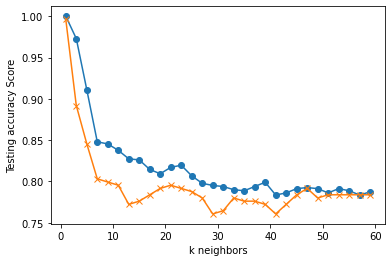

In [12]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 60, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 60, 2), train_scores, marker='o')
plt.plot(range(1, 60, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.892


In [14]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)
cm = confusion_matrix(y_true, y_pred)
cm

array([[163,  15],
       [ 13,  68]], dtype=int64)

In [15]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       178
           1       0.82      0.84      0.83        81

    accuracy                           0.89       259
   macro avg       0.87      0.88      0.88       259
weighted avg       0.89      0.89      0.89       259



In [16]:
from sklearn.metrics import roc_curve

In [17]:
y_pred_proba = knn.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

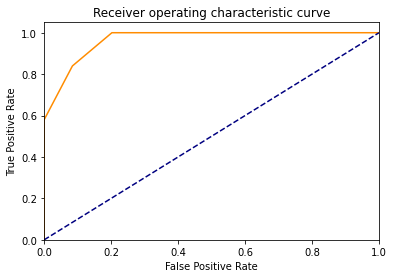

In [18]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.show()

In [19]:
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
roc_auc

0.9660840615896795

In [20]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

              precision    recall  f1-score   support

        blue       0.00      0.00      0.00       178
         red       0.31      1.00      0.48        81

    accuracy                           0.31       259
   macro avg       0.16      0.50      0.24       259
weighted avg       0.10      0.31      0.15       259



C:\Users\Walte\.conda\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Walte\.conda\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Walte\.conda\envs\PythonAdv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##  Remember Check Base Rate Fallacy !!!
#### Also maybe check lasso, Ridge and/or elasticnet for linear regressions to fine tune....
#### maybe oen of those t-sne plots (?)